# InSituPy demonstration - Add annotations

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
from insitupy import InSituData

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder

In [5]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")
xd = InSituData.read(insitupy_project)

In [6]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy

No modalities loaded.

In [7]:
xd.load_images()
xd.load_cells()

Loading images...


In [8]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'X_pca', 'X_umap', 'spatial'
           varm: 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear

## Create annotations

For the analysis of spatial transcriptomic datasets the inclusion of annotations from experts of disease pathology is key. Here, we demonstrate two ways how to annotate Xenium data
1. Within `InSituPy` using the `napari` viewer.
2. Using [QuPath](https://qupath.github.io/).

Importantly, `InSituPy` differentiates between "regions" and histological "annotations". Annotations consist of polygons with each polygon getting assigned to a certain “class” (e.g. “tumor cells”, “immune cells”, "stroma", etc.) and a “key” (e.g. the name of the pathologist doing the annotations). The classes within one key do not have to be unique (multiple annotations could contain tumor cells) and a unique identifier is used to differentiate between the polygons. Regions also consist of polygons and a key for a cohesive group of polygons but each polygon within one key is required to have a unique name. Regions can delineate the positions of TMA cores or the position of different tissue sections or regions of interests within the same dataset. 

### 1. In `napari` viewer

First visualize the Xenium data using `.show()`.

In [9]:
xd.show()

A new annotation layer can be added using the "Add geometries" widget on the bottom right.<br><br>
<left><img src="./demo_screenshots/add_geometries_widget.JPG" width="200"/></left>

As described above, `InSituPy` differentiates between "regions" and histological "annotations". Since napari creates separate layers for point and shape annotations, the "annotations" are split further into two subtypes, resulting in a total of three possible geometry types one can chose from:
1. Geometric annotations <br>
<img src="./demo_screenshots/annotation_layer.jpg" width="200"/>
2. Point annotations <br>
<img src="./demo_screenshots/point_layer.jpg" width="200"/>
3. Region <br>
<img src="./demo_screenshots/region_layer.jpg" width="200"/>

Since `InSituPy` uses different icons to differentiate between the types, it is important to add the geometries via this widget and not via the normal `napari` annotation panel.

After adding the respective shapes layer, one can now add shapes using the tool box of napari on the top left. E.g. for a geometric annotation, the tool set would look like this:<br><br>
<img src="./demo_screenshots/annotation_tools.jpg" width="200"/>

After adding the geometries, they can be imported into the `InSituPy` object using `.store_geometries()`:

In [10]:
xd.store_geometries()

Added 4 new annotations to key 'TestKey'
Added 1 new regions to key 'TestKey'


In [11]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'X_pca', 'X_umap', 'spatial'
           varm: 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
   

In [12]:
xd.annotations["TestKey"]

,objectType,geometry,name,color,origin,layer_type
id,,,,,,
ed566b7f-240f-4ba6-8fe7-0dcbe950a99d,annotation,"POLYGON ((1311.97499 1148.21717, 2450.76247 11...",TestClass,"[255, 0, 0]",manual,Shapes
b640abc8-6ab4-4bcb-9320-6248d01107ba,annotation,"POLYGON ((4530.28744 1829.01404, 6436.51866 18...",TestClass,"[255, 0, 0]",manual,Shapes
3589ec17-4d6d-4caf-aedd-cdd5fd7724cc,annotation,"POLYGON ((1126.30312 2806.88590, 2302.22497 28...",TestClass,"[255, 0, 0]",manual,Shapes
835ca15d-d3ae-4615-afd3-d1ca450b3648,annotation,"POLYGON ((3044.91246 3289.63277, 4208.45620 32...",TestClass,"[255, 0, 0]",manual,Shapes


### 2. Create annotations in QuPath

To create annotations in QuPath, follow these steps:

1. Export the registered HE image as OME-TIFF by setting `as_zarr=False`:

In [13]:
xd.images.save("./out/image_export", keys_to_save="HE", as_zarr=False)

Saving image to out\image_export\HE.ome.tif


2. Open the exported image in QuPath and start with the annotations. Documentations on QuPath can be found [here](https://qupath.readthedocs.io/en/stable/index.html).

3. Select a annotation tool from the bar on the top left:

<center><img src="./demo_screenshots/qupath_annotation_buttons.jpg" width="300"/></center>

4. Add as many annotations as you want and label them by setting classes in the annotation list. Do not forget to press the "Set class" button:

<center><img src="./demo_screenshots/qupath_annotation_list.jpg" width="350"/></center>

5. Export annotations using `File > Export objects as GeoJSON`. Tick `Pretty JSON` to get an easily readable JSON file. The file name needs to have following structure: `annotation-{slide_id}__{sample_id}__{annotation_label}`.

### Import annotations into `InSituData`

For demonstration purposes, we created dummy annotation files in `./demo_annotations/`. To add the annotations to `InSituData` follow the steps below.



## Import annotations and regions

Since annotations could have been done on images with different resolutions, it is important to specify the `pixel_size` during the import. In standard Xenium experiments the pixel size is 0.2125 µm but if the images were downscaled before the annotation, this value might differ.

In `QuPath` the pixel size and other image metadata can be looked up under "Image" and "Pixel width" or "Pixel height":
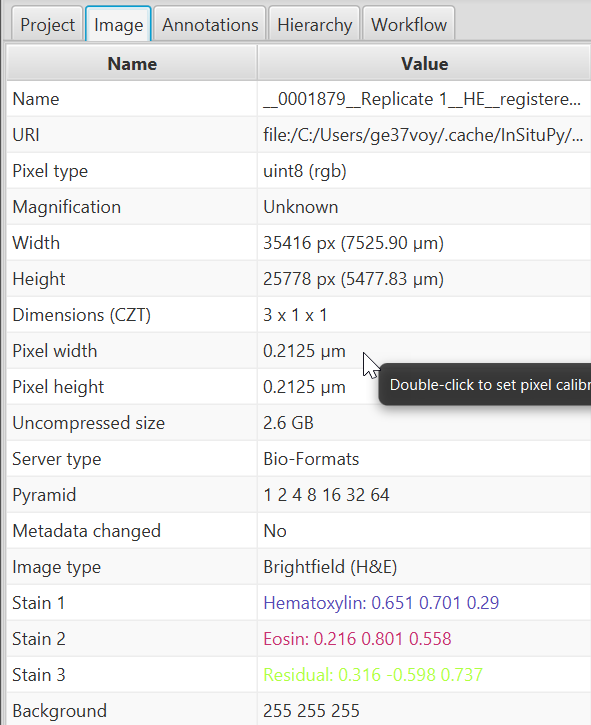

In [14]:
xd.import_annotations(
    files=[
        "./demo_annotations/annotations-0001879__Replicate 1__demo.geojson",
        "./demo_annotations/annotations-0001879__Replicate 1__demo2.geojson",
        "./demo_annotations/annotations-mixed_types.geojson"
           ],
    keys=["demo", "demo2", "demo3"],
    scale_factor=0.2125
    )

In [15]:
xd.annotations["demo"]

,objectType,geometry,name,color,origin,layer_type
id,,,,,,
bd3aacca-1716-4df8-91dd-bf8f6413a7bd,annotation,"POLYGON ((1883.38750 2297.97500, 1883.38750 23...",Positive,"[250, 62, 62]",file,Shapes
69814505-4059-42cd-8df2-752f7eb0810d,annotation,"POLYGON ((2782.90000 2654.55000, 2777.88500 26...",Positive,"[250, 62, 62]",file,Shapes
1957cd32-0a21-4b45-9dae-ecf236217140,annotation,"POLYGON ((6582.24275 4874.32500, 6583.67500 48...",Negative,"[112, 112, 225]",file,Shapes
19d2197a-1b8e-456f-8223-fba74641ac1c,annotation,"POLYGON ((6622.56250 3486.70000, 6619.16250 34...",Negative,"[112, 112, 225]",file,Shapes


In [16]:
xd.annotations["demo2"]

,objectType,geometry,name,color,origin,layer_type
id,,,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((5380.28750 827.05000, 5379.01250 827...",Negative,"[112, 112, 225]",file,Shapes
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((6576.87500 2306.68750, 6575.60000 23...",Positive,"[250, 62, 62]",file,Shapes
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((4575.97500 4152.46250, 4575.97...",Other,"[255, 200, 0]",file,Shapes
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((1381.46250 3639.27500, 1380.18750 36...",Other,"[255, 200, 0]",file,Shapes
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((6272.92137 3936.13750, 6263.65000 39...",Negative,"[112, 112, 225]",file,Shapes


In [17]:
xd.annotations["demo3"]

,objectType,geometry,name,color,origin,layer_type
id,,,,,,
8f57c3c3-2216-48b7-99bd-aba12d8c3c41,annotation,"POLYGON ((3828.40000 2261.74375, 3827.81350 22...",Stroma,"[150, 200, 150]",file,Shapes
7e8f8db4-81d4-472e-8e93-0fc756df87aa,annotation,"POLYGON ((2618.42500 1436.07500, 2618.07225 14...",Stroma,"[150, 200, 150]",file,Shapes
38a48ddb-f33c-4c61-b996-330b25d84081,annotation,"LINESTRING (3600.55750 1648.75350, 3878.03575 ...",Necrosis,"[50, 50, 50]",file,Shapes
eee244c9-e919-41ae-bb91-44c7abcc0cec,annotation,"LINESTRING (2483.62350 1334.39587, 2855.93413 ...",Immune cells,"[160, 90, 160]",file,Shapes
e3d4c0b6-0998-4692-ab7d-f580f713e275,annotation,POINT (5096.23663 1632.56312),unclassified,"[0, 0, 0]",file,Points
e9105240-3b35-489e-994f-e8f9c4786516,annotation,"MULTIPOINT (4219.65500 1650.71913, 4261.94675 ...",Stroma,"[150, 200, 150]",file,Points
2802df97-78ad-44ac-8e6b-d9b9406c8e3f,annotation,"MULTIPOINT (3372.79150 2005.41562, 3530.04150 ...",Tumor,"[200, 0, 0]",file,Points


## Load regions

Regions can be created in QuPath either as described above or using tools like the TMA dearrayer. They are also exported as objects as annotations but different to annotations they do not have a classification and each name of a region has to be unique.

In the following demo regions are read. One of the region files has non-unique names to demonstrate the warning that appears in this case.

### Classes have to be unique in regions

When reading an "Annotation" `.geojson` as shown below, the `import_regions` function throws an error indicating that in regions only one geometry per class is allowed. Further, only normal polygons (`shapely.Polygon`-typed) are allowed. Any other types of geometries (Points, Lines, MultiPolygons, ...) are skipped.

In [18]:
xd.import_regions(
    files=[
        "./demo_annotations/annotations-mixed_types.geojson"
        ],
    keys=['test'],
    scale_factor=0.2125
    )

Multiple regions can be imported simultaneously.

In [19]:
xd.import_regions(
    files=[
        "./demo_regions/regions-0001879__Replicate 1__demo_regions.geojson",
        "./demo_regions/regions-0001879__Replicate 1__TMA.geojson",
        ],
    keys=['demo_regions', 'TMA'],
    scale_factor=0.2125
    )

Properties of the `anotations` and `regions` modalities can be inspected in the InSituData representation:

In [20]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'X_pca', 'X_umap', 'spatial'
           varm: 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear
   

## Visualization of `annotations` and `regions` using `napari` viewer

Ìf the `InSituData` object only contains `.annotations` or `.regions` attributes, one can choose between the "Add geometries" and "Show geometries" widgets:
<center><img src="./demo_screenshots/toggle_geometry_widgets.jpg" width="200"/></center>

Annotations and regions stored in the `InSituData` object can be visualized using the "Show geometries" widget:
<center><img src="./demo_screenshots/show_geometries_widget.jpg" width="200"/></center>

To show the names of the annotations, tick "Show names":
<center><img src="./demo_screenshots/show_names_example.jpg" width="200"/></center>


In [21]:
xd.show()

### Assign annotations to observations

To use the annotations in analyses (e.g. to select only observations within a certain annotation or compare gene expression between different annotations) one can use the `assign_annotations` function. It adds columns containing the annotation class to `xd.matrix.obs`. The column has the syntax `annotation-{Label}` and if an observation is not part of any annotation within this label, it contains `NaN`. 

In [22]:
xd.assign_annotations(overwrite=True)

Assigning key 'TestKey'...
Added results to `.cells.matrix.obsm['annotations']
Assigning key 'demo'...
Added results to `.cells.matrix.obsm['annotations']
Assigning key 'demo2'...
Added results to `.cells.matrix.obsm['annotations']
Assigning key 'demo3'...
Added results to `.cells.matrix.obsm['annotations']


In [23]:
xd.assign_regions()

Assigning key 'TestKey'...
Added results to `.cells.matrix.obsm['regions']
Assigning key 'test'...
Added results to `.cells.matrix.obsm['regions']
Assigning key 'demo_regions'...
Added results to `.cells.matrix.obsm['regions']
Assigning key 'TMA'...
Added results to `.cells.matrix.obsm['regions']


In [24]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'X_pca', 'X_umap', 'spatial', 'annotations', 'regions'
           varm: 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData object with 2 entries:
               cellular


After assigning the annotations, the labels analyzed here are marked with a ✔:

In [25]:
xd.regions["demo_regions"]

,objectType,name,geometry,origin,layer_type
id,,,,,
2d0da635-c408-459f-9178-839097fe5a98,annotation,Region1,"POLYGON ((1564.42500 1321.96250, 2267.80000 13...",file,Shapes
ce6c2342-620d-4f44-be03-68a4454e9b33,annotation,Region2,"POLYGON ((4541.76250 1356.38750, 5613.82500 13...",file,Shapes
70a125ec-c53e-469b-8927-efe224e504c1,annotation,Region3,"POLYGON ((2110.76250 2708.31250, 3387.67500 27...",file,Shapes


Following cells show examples how to explore the assigned annotations:

In [26]:
xd.cells.matrix.obsm['annotations']['demo2']

1         unassigned
2         unassigned
5         unassigned
8         unassigned
9         unassigned
             ...    
167776    unassigned
167777    unassigned
167778    unassigned
167779    unassigned
167780    unassigned
Name: demo2, Length: 163565, dtype: object

In [27]:
# print number of cells within each annotation
annots = xd.cells.matrix.obsm['annotations']['demo2']
annots.value_counts()

demo2
unassigned    154218
Negative        4961
Other           2614
Positive        1772
Name: count, dtype: int64

In [28]:
# show geopandas dataframe for one annotation
xd.annotations["demo2"]

,objectType,geometry,name,color,origin,layer_type
id,,,,,,
1970eccb-ad38-4b4b-b7a8-54509027b57d,annotation,"POLYGON ((5380.28750 827.05000, 5379.01250 827...",Negative,"[112, 112, 225]",file,Shapes
a3b32cce-1bb9-4a6f-b1d1-9e0c44420cfa,annotation,"POLYGON ((6576.87500 2306.68750, 6575.60000 23...",Positive,"[250, 62, 62]",file,Shapes
92bfe928-a21f-4864-b7cb-f0d300113d88,annotation,"MULTIPOLYGON (((4575.97500 4152.46250, 4575.97...",Other,"[255, 200, 0]",file,Shapes
a6c17a54-6839-40b2-8531-c9227635f344,annotation,"POLYGON ((1381.46250 3639.27500, 1380.18750 36...",Other,"[255, 200, 0]",file,Shapes
e78efe2f-d185-4ab6-9cc9-6621897f3662,annotation,"POLYGON ((6272.92137 3936.13750, 6263.65000 39...",Negative,"[112, 112, 225]",file,Shapes


## Save imported annotations in `InSituPy` project

In [29]:
xd.annotations.metadata

{'TestKey': {'n_annotations': 4, 'classes': ['TestClass'], 'analyzed': '✔'},
 'demo': {'n_annotations': 4,
  'classes': ['Positive', 'Negative'],
  'analyzed': '✔'},
 'demo2': {'n_annotations': 5,
  'classes': ['Negative', 'Positive', 'Other'],
  'analyzed': '✔'},
 'demo3': {'n_annotations': 7,
  'classes': ['Stroma', 'Necrosis', 'Immune cells', 'unclassified', 'Tumor'],
  'analyzed': '✔'}}

In [30]:
xd.save()

Updating project in c:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
	Updating cells...
	Updating annotations...
	Updating regions...
Saved.
